In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1797, 64)
Shape of y: (1797,)


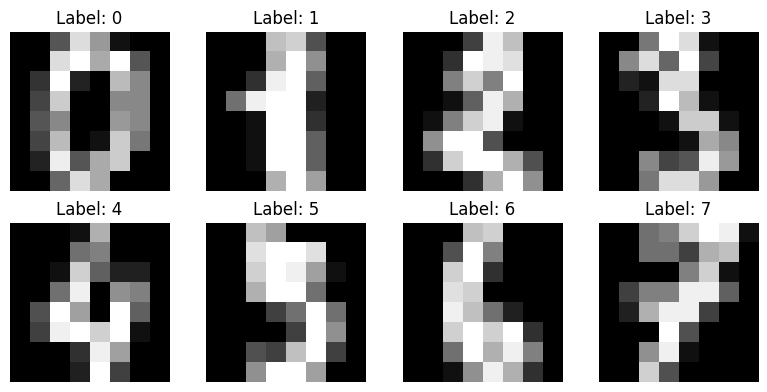

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with K=3:", accuracy)


Accuracy with K=3: 0.9694444444444444


In [8]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

print("K values:", k_values)
print("Accuracies:", accuracies)


K values: [3, 5, 7, 9]
Accuracies: [0.9694444444444444, 0.975, 0.9722222222222222, 0.9722222222222222]


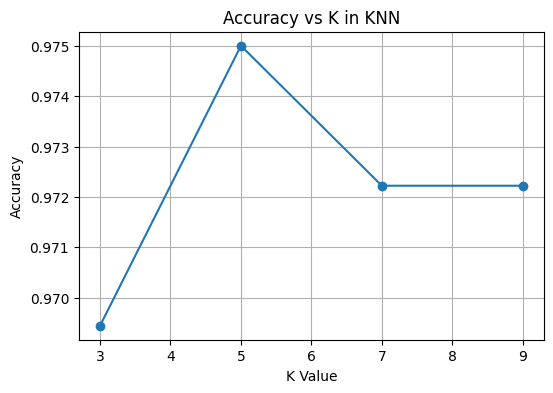

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K in KNN")
plt.grid(True)
plt.show()


In [12]:
import numpy as np

best_k = k_values[np.argmax(accuracies)]

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

y_pred_best = knn_best.predict(X_test_scaled)


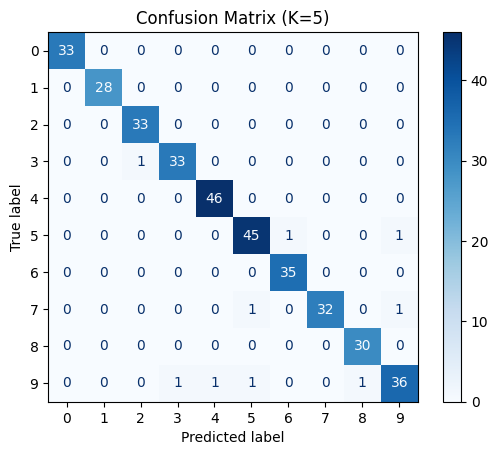

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()


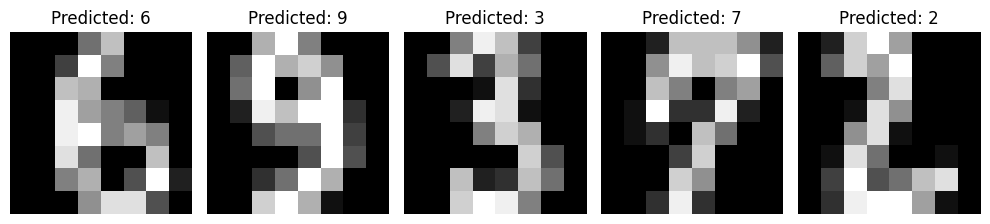

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Predicted: {y_pred_best[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
